In [4]:
from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM
import pandas as pd

In [6]:
data = pd.DataFrame({
    "country": [
        "United States",
        "United Kingdom",
        "France",
        "Germany",
        "Italy",
        "Spain",
        "Canada",
        "Australia",
        "Japan",
        "China",
    ],
    "gdp": [
        19294482071552,
        2891615567872,
        2411255037952,
        3435817336832,
        1745433788416,
        1181205135360,
        1607402389504,
        1490967855104,
        4380756541440,
        14631844184064,
    ],
    "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12],
})

In [5]:
model = LocalLLM(
    api_base='http://localhost:11434/v1',
    model='llama3:8b'
)

In [7]:
sdf = SmartDataframe(data, config={'llm': model})

In [21]:
new_df = sdf.chat('what are the 5 happiest countries? return all columns as a new dataframe')
new_df[:3]

{'type': 'dataframe', 'value':           country  happiness_index
6          Canada             7.23
7       Australia             7.22
1  United Kingdom             7.16
3         Germany             7.07
0   United States             6.94}


,country,happiness_index
6,Canada,7.23
7,Australia,7.22
1,United Kingdom,7.16


In [8]:
sdf.chat("Return the top 5 countries by GDP")

{'type': 'dataframe', 'value':           country             gdp  happiness_index
0   United States  19294482071552             6.94
9           China  14631844184064             5.12
8           Japan   4380756541440             5.87
3         Germany   3435817336832             7.07
1  United Kingdom   2891615567872             7.16}


,country,gdp,happiness_index
0,United States,19294482071552,6.94
9,China,14631844184064,5.12
8,Japan,4380756541440,5.87
3,Germany,3435817336832,7.07
1,United Kingdom,2891615567872,7.16


In [9]:
sdf.chat("What's the sum of the gdp of the 2 unhappiest countries?")

{'type': 'number', 'value': 3098370244608}


3098370244608

In [11]:
print(sdf.last_code_generated)

dfs[0] = dfs[0].sort_values(by='happiness_index')
unhappiest_countries = dfs[0].iloc[-2:]
gdp_sum = unhappiest_countries['gdp'].sum()
result = {'type': 'number', 'value': gdp_sum}
print(result)


{'type': 'plot', 'value': '/Users/mikeqiu/code/python/web/exports/charts/temp_chart.png'}


'/Users/mikeqiu/code/python/web/exports/charts/temp_chart.png'

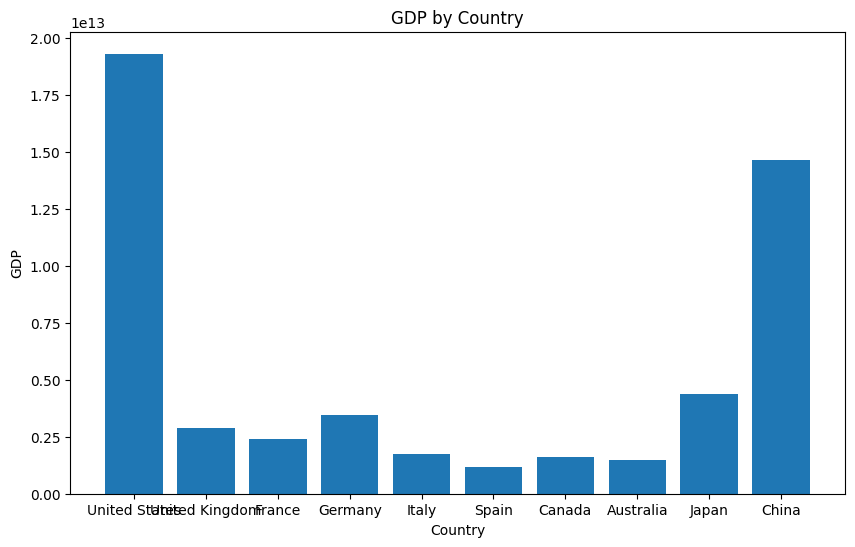

In [12]:
sdf.chat("Plot a chart of the gdp by country")

In [13]:
print(sdf.last_code_generated)

plt.figure(figsize=(10, 6))
plt.bar(dfs[0]['country'], dfs[0]['gdp'])
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('GDP by Country')
plt.savefig('/Users/mikeqiu/code/python/web/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/Users/mikeqiu/code/python/web/exports/charts/temp_chart.png'}
print(result)


# smart datalake

In [16]:
from pandasai import SmartDatalake

employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

lake = SmartDatalake([employees_df, salaries_df], config={'llm': model})

In [17]:
lake.chat("What's the name of the employee that gets paid the most?")

{'type': 'string', 'value': 'The highest salary is 7000 and it belongs to Olivia.'}


'The highest salary is 7000 and it belongs to Olivia.'

In [18]:
print(lake.last_code_executed)

highest_salary = dfs[1].max().Salary
highest_paid_employee = dfs[1][dfs[1]['Salary'] == highest_salary].iloc[0]['EmployeeID']
result_employees = dfs[0][dfs[0]['EmployeeID'] == int(highest_paid_employee)]
result = {'type': 'string', 'value': f"The highest salary is {highest_salary} and it belongs to {result_employees.iloc[1]['Name']}."}
print(result)


In [24]:
lake.chat('what is the average salary in the IT department')

Traceback (most recent call last):
  File "/Users/mikeqiu/code/python/web/venv/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mikeqiu/code/python/web/venv/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 171, in execute_code
    exec(code, environment)
  File "<string>", line 2, in <module>
  File "/Users/mikeqiu/code/python/web/venv/lib/python3.11/site-packages/pandas/core/generic.py", line 5915, in __setattr__
    return object.__setattr__(self, name, value)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas/_libs/properties.pyx", line 69, in pandas._libs.properties.AxisProperty.__set__
  File "/Users/mikeqiu/code/python/web/venv/lib/python3.11/site-packages/pandas/core/generic.py", line 823, in _set_axis
    self._mgr.set_axis(axis, labels)
  File "/Users/mikeqiu/code

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'